#### Импортируем нужные библиотеки

In [1]:
from utilities import transform_data, transform_data_lab3
from plot_graphics import plot_models

from sklearn.ensemble import BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor, StackingClassifier, StackingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, LogisticRegression, Lars
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Обрабатываем данные из лабораторной №2

In [2]:
train_df = pd.read_csv('data_lab2/train.csv', sep=',', header=0,
                        index_col=False)
lab2_cat = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
lab2_num = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
            'Fare']

train_df = transform_data(train_df, lab2_num, lab2_cat, 2)

In [3]:
train_df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,534.000000,534.000000,534.00000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,0.391386,0.663858,0.64794,0.371441,0.068586,0.063358,0.063983,1.518727
std,0.488518,0.419757,0.47806,0.171879,0.150849,0.136560,0.101894,0.797878
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.00000,0.258608,0.000000,0.000000,0.015412,1.000000
50%,0.000000,1.000000,1.00000,0.359135,0.000000,0.000000,0.025374,2.000000
75%,1.000000,1.000000,1.00000,0.464690,0.125000,0.000000,0.061045,2.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000


#### Обрабатываем данные из лабораторной №3

In [4]:
train_df2 = pd.read_csv('data_lab3/train.csv')
train_df2.drop("id", axis=1, inplace=True)
train_df2.describe(include='all')

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,2.039604,0.040842,50.781176,4.894802,8.935644,0.142327,0.101485,0.024752,0.101485,0.772277,...,10.372525,4.674505,0.143564,7.788366,2.501238,13.263614,4.149752,6.754950,13.470297,2.699083e+06
std,0.996109,0.198046,19.827507,3.760826,4.754526,0.349601,0.302157,0.155466,0.302157,0.419622,...,15.397133,3.255991,0.378064,8.983450,1.636025,7.557860,5.955523,6.873569,8.068579,1.096460e+06
min,1.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,1.000000,0.000000,37.650000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,2.000000,7.000000,1.950000e+06
50%,2.000000,0.000000,48.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,4.000000,4.000000,0.000000,6.000000,2.000000,13.000000,3.000000,5.000000,12.000000,2.550000e+06
75%,3.000000,0.000000,63.075000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,12.000000,7.000000,0.000000,9.000000,4.000000,18.000000,5.000000,10.000000,19.000000,3.310000e+06
max,5.000000,1.000000,120.000000,24.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,86.000000,14.000000,2.000000,67.000000,8.000000,42.000000,52.000000,40.000000,40.000000,6.800000e+06


In [5]:
all_cols = train_df.columns[1:]
x = train_df[all_cols]
y = train_df['Survived']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=0)

### Классификация

#### Bagging

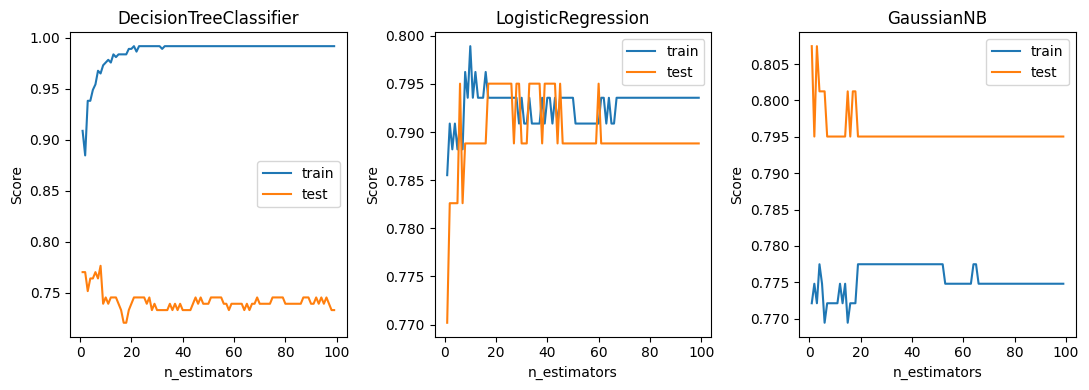

In [6]:
plot_models(BaggingClassifier, [DecisionTreeClassifier, LogisticRegression, GaussianNB], ['DecisionTreeClassifier', 'LogisticRegression', 'GaussianNB'], x_train1, y_train1, x_test1, y_test1)

#### Boosting

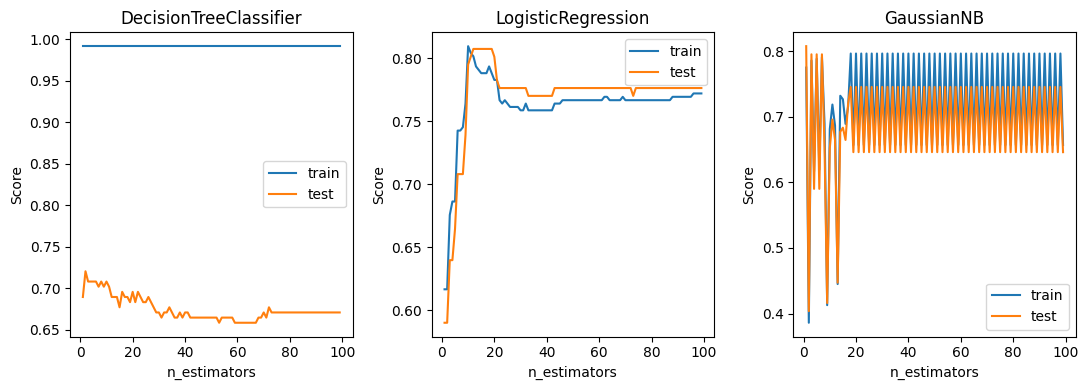

In [7]:
plot_models(AdaBoostClassifier, [DecisionTreeClassifier, LogisticRegression, GaussianNB], ['DecisionTreeClassifier', 'LogisticRegression', 'GaussianNB'], x_train1, y_train1, x_test1, y_test1)

#### Stacking

In [8]:
estimators = [
    ('knn', KNeighborsClassifier()),
    ('qda', QuadraticDiscriminantAnalysis()),
    ('gnb', GaussianNB()),
    ('lda', LinearDiscriminantAnalysis()),
    ('lr', LogisticRegression()),
]

estimators_2 = [
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lr', LogisticRegression()),
    ('gnb', GaussianNB()),
    ('lda', LinearDiscriminantAnalysis()),
]

estimators_3 = [
    ('knn', KNeighborsClassifier()),
    ('lr', LogisticRegression()),
    ('lda', LinearDiscriminantAnalysis()),
]

st1 = StackingClassifier(estimators = estimators)
st1.fit(x_train1, y_train1)
print(f'Estimators_1 Score: {st1.score(x_test1, y_test1)}')

st2 = StackingClassifier(estimators = estimators_2)
st2.fit(x_train1, y_train1)
print(f'Estimators_2 Score: {st2.score(x_test1, y_test1)}')

st3 = StackingClassifier(estimators = estimators_3)
st3.fit(x_train1, y_train1)
print(f'Estimators_3 Score: {st3.score(x_test1, y_test1)}')

Estimators_1 Score: 0.7950310559006211
Estimators_2 Score: 0.782608695652174
Estimators_3 Score: 0.8012422360248447


### Регрессия

In [9]:
x, y = transform_data_lab3(train_df2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#### Bagging

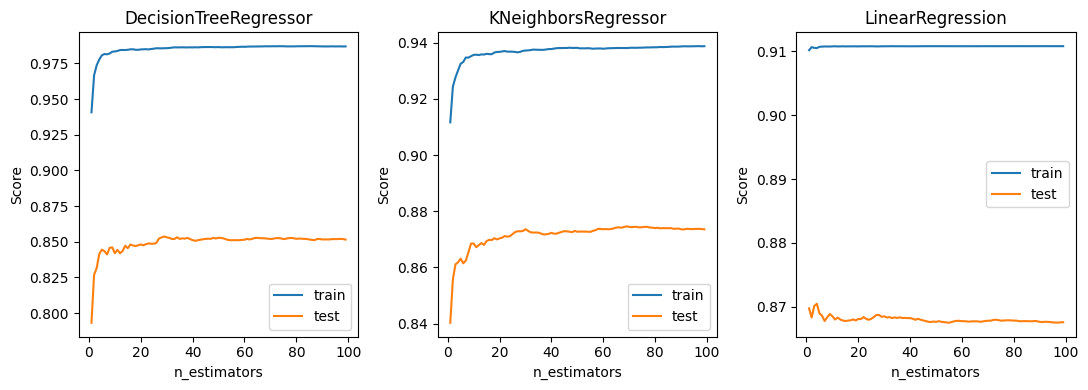

In [10]:
plot_models(BaggingRegressor, [DecisionTreeRegressor, KNeighborsRegressor, LinearRegression], ['DecisionTreeRegressor', 'KNeighborsRegressor', 'LinearRegression'], x_train, y_train, x_test, y_test)

#### Boosting

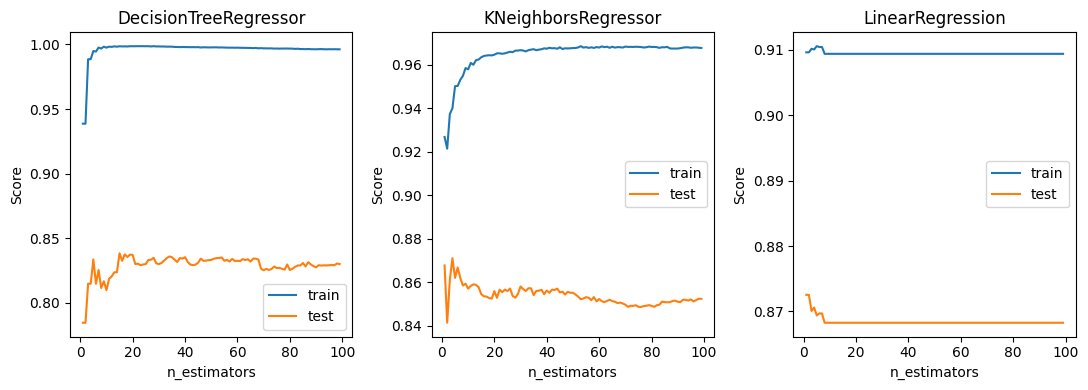

In [11]:
plot_models(AdaBoostRegressor, [DecisionTreeRegressor, KNeighborsRegressor, LinearRegression], ['DecisionTreeRegressor', 'KNeighborsRegressor', 'LinearRegression'], x_train, y_train, x_test, y_test)

#### Stacking

In [12]:
estimators = [
    ('lr', LinearRegression()),
    ('en', ElasticNet()),
    ('dr', DecisionTreeRegressor()),
]

estimators_2 = [
    ('rf', RandomForestRegressor()),
    ('knn', KNeighborsRegressor()),
    ('dt', DecisionTreeRegressor()),
    ('lr', LinearRegression()),
    ('en', ElasticNet()),
    ('lar', Lars()),
]

estimators_3 = [
    ('knn', KNeighborsRegressor()),
    ('lr', LinearRegression()),
    ('lar', Lars()),
]

strg1 = StackingRegressor(estimators = estimators)
strg1.fit(x_train, y_train)
print(f'Estimator_1 Score: {strg1.score(x_test, y_test)}')

strg2 = StackingRegressor(estimators = estimators_2)
strg2.fit(x_train, y_train)
print(f'Estimator_2 Score: {strg2.score(x_test, y_test)}')

strg3 = StackingRegressor(estimators = estimators_3)
strg3.fit(x_train, y_train)
print(f'Estimator_3 Score: {strg3.score(x_test, y_test)}')

Estimator_1 Score: 0.858746508565372
Estimator_2 Score: 0.831362192525781
Estimator_3 Score: 0.8802562801424754


### Обучение и сравнение моделей

#### Классификация

In [23]:
model_score = {}

In [24]:
# Bagging
grid = GridSearchCV(BaggingClassifier(GaussianNB()), {'n_estimators': range(1, 16)})
grid.fit(x_train1, y_train1)
y_test_pred = grid.predict_proba(x_test1)[:, 1]
model_score.update({'BaggingClassifier': roc_auc_score(y_test1, y_test_pred)})

In [25]:
# Ada
grid = GridSearchCV(AdaBoostClassifier(LogisticRegression()), {'n_estimators': range(1, 20)})
grid.fit(x_train1, y_train1)
y_test_pred = grid.predict_proba(x_test1)[:, 1]
model_score.update({'AdaBoostClassifier': roc_auc_score(y_test1, y_test_pred)})

In [26]:
# Stack
y_test_pred = st3.predict_proba(x_test1)[:, 1]
model_score.update({'StackingClassifier': roc_auc_score(y_test1, y_test_pred)})

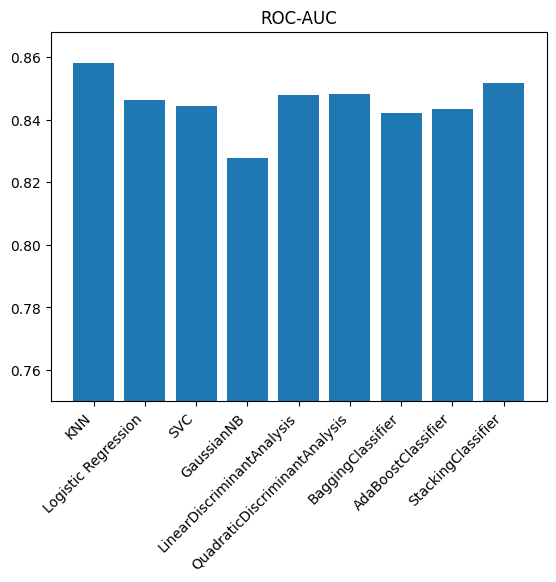

In [27]:
classifications = {'KNN': 0.8580721466587818,
                   'Logistic Regression': 0.8461265523358958,
                   'SVC': 0.8443524541691307, 'GaussianNB': 0.8276759314015376,
                   'LinearDiscriminantAnalysis': 0.8479006505026613,
                   'QuadraticDiscriminantAnalysis': 0.8482554701360142}
classifications.update(model_score)
plt.bar(classifications.keys(), classifications.values())
plt.xticks(rotation=45, ha='right')
plt.gca().set_ylim([0.75, max(classifications.values()) + 0.01])
plt.title('ROC-AUC')
plt.show()

#### Регрессия

In [18]:
model_score = {}

In [19]:
# Bagging
grid = GridSearchCV(BaggingRegressor(KNeighborsRegressor()), {'n_estimators': range(22, 38)})
grid.fit(x_train, y_train)
y_test_pred = grid.predict(x_test)
model_score.update({'BaggingRegressor': r2_score(y_test, y_test_pred)})

In [20]:
# Ada
grid = GridSearchCV(AdaBoostRegressor(KNeighborsRegressor()), {'n_estimators': range(1, 20)})
grid.fit(x_train, y_train)
y_test_pred = grid.predict(x_test)
model_score.update({'AdaBoostRegressor': r2_score(y_test, y_test_pred)})

In [21]:
# Stack
y_test_pred = strg3.predict(x_test)
model_score.update({'StackingRegressor': r2_score(y_test, y_test_pred)})

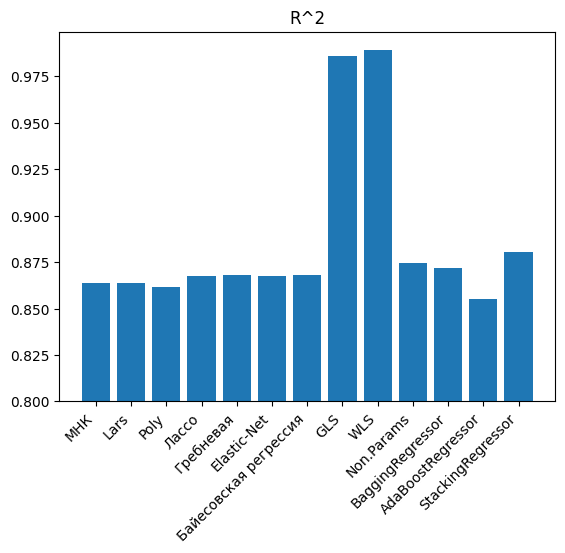

In [22]:
regressions_r2 = {
    'МНК': 0.863567,
    'Lars': 0.863567,
    'Poly': 0.861733,
    'Лассо': 0.867668,
    'Гребневая': 0.867952,
    'Elastic-Net': 0.867669,
    'Байесовская регрессия': 0.868259,
    'GLS': 0.986,
    'WLS': 0.989,
    'Non.Params': 0.8746651412735535
}
regressions_r2.update(model_score)
plt.bar(regressions_r2.keys(), regressions_r2.values())
plt.xticks(rotation=45, ha='right')
plt.gca().set_ylim([0.80, max(regressions_r2.values()) + 0.01])
plt.title('R^2')
plt.show()